<a href="https://colab.research.google.com/github/zanuarts/dicoding-BPML/blob/master/dicoding_5_transferLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pengembangan_academy/Chessman-image-dataset.zip \
  -O /tmp/Chessman-image-dataset.zip

--2020-08-22 18:42:31--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pengembangan_academy/Chessman-image-dataset.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60684125 (58M) [application/zip]
Saving to: ‘/tmp/Chessman-image-dataset.zip’

/tmp/Chessman-image 100%[===================>]  57.87M  24.1MB/s    in 2.4s    

2020-08-22 18:42:34 (24.1 MB/s) - ‘/tmp/Chessman-image-dataset.zip’ saved [60684125/60684125]



In [3]:
import os
import zipfile
local_zip = '/tmp/Chessman-image-dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [4]:
os.listdir('/tmp/Chessman-image-dataset/Chess')

['Rook', 'Queen', 'Pawn', 'King', 'Knight', 'Bishop']

In [5]:
print('total pawn images : ', len(os.listdir('/tmp/Chessman-image-dataset/Chess/Pawn')))
print('total King images : ', len(os.listdir('/tmp/Chessman-image-dataset/Chess/King')))
print('total Knight images : ', len(os.listdir('/tmp/Chessman-image-dataset/Chess/Knight')))

total pawn images :  107
total King images :  76
total Knight images :  106


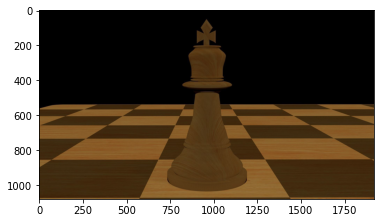

In [8]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
img = image.load_img('/tmp/Chessman-image-dataset/Chess/King/00000145.png')
imgplot = plt.imshow(img)

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = os.path.join('/tmp/Chessman-image-dataset/Chess')
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    zoom_range = 0.2,
    shear_range = 0.2,
    fill_mode = 'nearest',
    validation_split = 0.1
)

In [10]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 8,
    class_mode = 'categorical',
    subset = 'training'
)
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 16,
    class_mode = 'categorical',
    subset = 'validation'
)

Found 499 images belonging to 6 classes.
Found 52 images belonging to 6 classes.


In [19]:
import tensorflow as tf
from tensorflow.keras.layers import Input
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import ResNet152V2
model = tf.keras.models.Sequential([
    # tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', input_shape = (150, 150, 3)),
    # tf.keras.layers.MaxPooling2D(2,2),
    # tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
    # tf.keras.layers.MaxPooling2D(2,2),
    # tf.keras.layers.Dropout(0.4),
    # tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    # tf.keras.layers.MaxPooling2D(2,2),
    # tf.keras.layers.Dropout(0.4),
    ResNet152V2(weights = "imagenet", include_top = False, input_tensor = Input(shape=(150,150, 3))),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dense(6, activation = 'softmax')
])
model.layers[0].trainable = False

234553344/234545216 [==============================] - 8s 0us/step


In [20]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [21]:
history = model.fit(
    train_generator,
    validation_data = validation_generator,
    epochs = 50, 
    verbose = 2
)

Epoch 1/50
63/63 - 105s - loss: 9.3307 - accuracy: 0.4309 - val_loss: 2.2410 - val_accuracy: 0.6538
Epoch 2/50
63/63 - 103s - loss: 2.0506 - accuracy: 0.6533 - val_loss: 1.0621 - val_accuracy: 0.6923
Epoch 3/50
63/63 - 103s - loss: 1.1463 - accuracy: 0.7575 - val_loss: 1.4521 - val_accuracy: 0.6923
Epoch 4/50
63/63 - 103s - loss: 1.0629 - accuracy: 0.7715 - val_loss: 1.8672 - val_accuracy: 0.6923
Epoch 5/50
63/63 - 103s - loss: 0.8009 - accuracy: 0.8196 - val_loss: 1.3647 - val_accuracy: 0.7500
Epoch 6/50
63/63 - 102s - loss: 0.5611 - accuracy: 0.8697 - val_loss: 0.8785 - val_accuracy: 0.7885
Epoch 7/50
63/63 - 104s - loss: 0.7000 - accuracy: 0.8297 - val_loss: 1.7823 - val_accuracy: 0.7308
Epoch 8/50
63/63 - 104s - loss: 0.8278 - accuracy: 0.8236 - val_loss: 1.6922 - val_accuracy: 0.7308
Epoch 9/50
63/63 - 104s - loss: 0.9984 - accuracy: 0.8116 - val_loss: 1.7135 - val_accuracy: 0.6538
Epoch 10/50
63/63 - 104s - loss: 0.5135 - accuracy: 0.8998 - val_loss: 1.1761 - val_accuracy: 0.7115

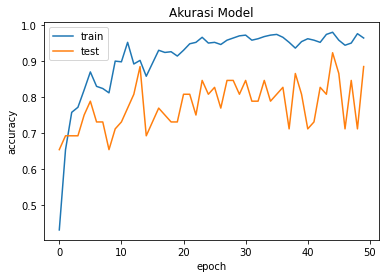

In [22]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

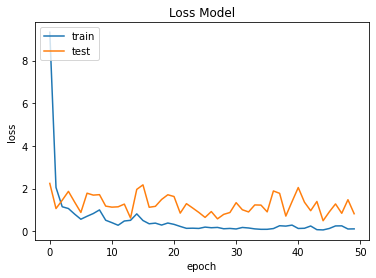

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()